In [173]:
import tensorflow as tf

In [174]:
mnist= tf.keras.datasets.mnist

In [175]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [176]:
x_train.shape

(60000, 28, 28)

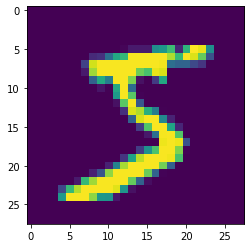

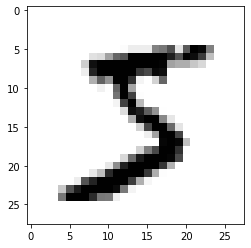

In [177]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])#first image of train set
plt.show()
plt.imshow(x_train[0] ,cmap=plt.cm.binary)#to display it in binary, plt.show shows it in binary
#A binary image is one that consists of pixels that can have one of exactly two colors, usually black and white.

In [178]:
#checking the values of each pixel befire normalization
#we know if the puxel value is near to 255 it will be white if it is near to 0 it will be black
# all 0 are black in color, all 255 are white in color and other than that all are grey in color
print(x_train[0]) # an image of size 28*28

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

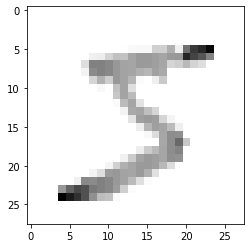

In [179]:
#since the images are gray image i.e between 0 and 255 
#so we nee to normalize |pre processing step
# The normalize function just performs a regular normalization to improve performance: Normalization is a rescaling of the 
# data from the original range so that all values are within the range of 0 and 1.
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [180]:
print(x_train[0]) # so we can see that all the values are now normalized..i.e. in between 0 and 1
#normalization is necessary bcz if the color changes we donot need to care about

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

print(y_train[0]) #since that image corresponds to 5 i.e. the above image ,so that it can target the label

Resizing the image to make it suitable to apply convolution operation

In [181]:
#using numpy bcz it is used to do various operations on array
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)#we are here just increasing one dimesion for kernal/filter operation
#Here -1 corresponds to 60000 i.e. the maximum size corresponds to -1
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training sampling dimensions",x_trainr.shape)
print("Testing sampling dimensions",x_testr.shape)

Training sampling dimensions (60000, 28, 28, 1)
Testing sampling dimensions (10000, 28, 28, 1)


Creating a Deep Neurak network
training 60000 samples of MNIST handwritten dataset

In [182]:
from tensorflow.keras.models import Sequential# the Sequential model is a linear stack of layers.
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [183]:
# Creating a neural network now
model = Sequential()
#First convolution layer 0 1 2 3 (60000,28,28,1) 28-3+1=26 26*26
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:])) #only for first convulation layer to mention inpur size
model.add(Activation("relu")) #activation function to make it non linear,values <0 are removed
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of (2*2)

#second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
#Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
#Fully connected layer #1
model.add(Flatten()) #Before using Fully connected layer need to flatten bcz 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))
          
#Fully Connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))
          
#Last Fully Connected layer ,Output must be equal to number of classes ,10(0 to 9)
model.add(Dense(10)) # last layer dense must be equal to 10
model.add(Activation("softmax")) #activation function is changed to softmax (gives class probablities)
# Binary classification, one neuron in ecah layer,sigmoid

In [184]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [185]:
print("Total training samples",len(x_trainr))

Total training samples 60000


In [186]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [187]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 48s 36ms/step - loss: 0.3190 - accuracy: 0.8982 - val_loss: 0.1359 - val_accuracy: 0.9581
Epoch 2/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.1023 - accuracy: 0.9695 - val_loss: 0.1188 - val_accuracy: 0.9629
Epoch 3/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0746 - accuracy: 0.9775 - val_loss: 0.0773 - val_accuracy: 0.9758
Epoch 4/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0634 - val_accuracy: 0.9813
Epoch 5/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0655 - val_accuracy: 0.9810


In [188]:
#if validation accuracy ~=accuracy then it is said that model is good
#else if suppose validation accuracy 30 <accuracy 98 ,model is not consudered good,we will suffer ##overfitting
#solution to overfitting--> dropout layer etc..
#in the above epoch validation accuracy is the one on the left side i.e .9614,.9697,.9782,.9761,.9800 etc

In [189]:
#evaluating on testing data set MNIT
test_loss,test_acc= model.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples",test_loss)
print("validation accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0646 - accuracy: 0.9818
Test loss on 10000 test samples 0.06456173211336136
validation accuracy on 10000 test samples 0.9818000197410583


In [190]:
#in the training set validation acc is .9800 and in test set it comes out as .9857 which are almost same that means we are 
#doing good

In [191]:
predictions=model.predict([x_testr])

313/313 [==============================] - 4s 11ms/step


In [192]:
print(predictions) #actually these predictions are based on one hot predictions so these are only arrays containing softmax probabilities

[[1.1189755e-07 2.2970848e-06 6.8755660e-05 ... 9.9992549e-01
  4.7158341e-08 2.8958036e-06]
 [4.7320009e-06 6.5026836e-07 9.9967420e-01 ... 2.2222954e-07
  8.0129212e-05 3.9107496e-07]
 [1.6174685e-06 9.9998641e-01 3.8143214e-06 ... 4.6703658e-06
  2.3538200e-06 3.0567071e-07]
 ...
 [6.2756228e-10 1.0505858e-06 1.0062469e-08 ... 5.5869356e-07
  7.5958515e-06 3.2445256e-05]
 [8.9936861e-05 7.4401191e-10 3.9835680e-08 ... 1.0286747e-08
  8.6199807e-06 3.3180021e-07]
 [1.2947169e-06 4.4678933e-07 2.7856233e-05 ... 3.4497338e-10
  6.9045382e-05 1.6874048e-07]]


In [193]:
#to convert the prediction from one hot ending, we need to use numpy for that
print(np.argmax(predictions[0])) # argmax will return the maximum value index and find the value of it

7


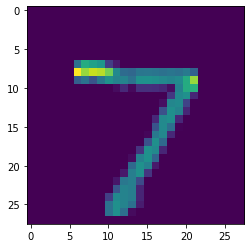

In [194]:
#now to check whwther our ans is true or false
plt.imshow(x_test[0])

In [195]:
print(np.argmax(predictions[219]))

5


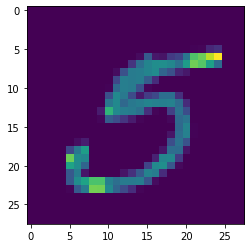

In [196]:
plt.imshow(x_test[219])

In [197]:
#Now checking using custom digit as the model is considered trained

In [198]:
import cv2 

In [272]:
img=cv2.imread("Digit.JPG")

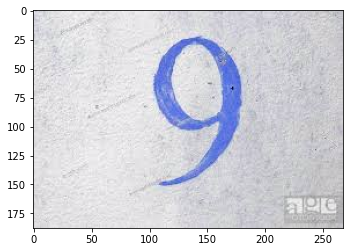

In [273]:
plt.imshow(img)

In [274]:
img.shape

(188, 268, 3)

In [275]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [276]:
gray.shape# 3 channals will be gone

(188, 268)

In [277]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [278]:
resized.shape

(28, 28)

In [279]:
#But before giving it to neural network we need to normalize...i.e we need scaling, 0 to 1 scaling
newimg=tf.keras.utils.normalize(resized,axis=1)

In [280]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) #kernal operation of convolution layer

In [281]:
newimg.shape

(1, 28, 28, 1)

In [282]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 22ms/step


In [283]:
print(np.argmax(predictions))

8
